In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sktime.forecasting.theta               import ThetaForecaster
from sktime.forecasting.base                import ForecastingHorizon
from sklearn.metrics                        import mean_squared_error

In [66]:
pdf = pd.read_csv("../data/monthly/ewz_stromabgabe_netzebenen_stadt_zuerich.csv",index_col=None)

pdf.index = pd.to_datetime(pdf['Timestamp'],utc=True)
pdf.index = pdf.index.tz_localize(None)  
pdf["y"] = pdf["NE7_GWh"].values
pdf = pdf.drop(columns=["Timestamp","NE5_GWh","NE7_GWh"])


split = len(pdf)-12
pdf_train, pdf_test = pdf.iloc[:split], pdf.iloc[split:]

In [69]:
idx = pd.period_range(start=pdf_train.index[0], end= pdf_train.index[-1], freq="M")
y = pd.Series(pdf_train.y.values, index=idx)
y

2015-01    172.482558
2015-02    157.543740
2015-03    165.323134
2015-04    148.718442
2015-05    150.259261
              ...    
2022-03    154.503365
2022-04    139.388619
2022-05    141.681254
2022-06    139.280821
2022-07    140.266726
Freq: M, Length: 91, dtype: float64

In [70]:
forecaster = ThetaForecaster(sp=12)  
forecaster.fit(y)  

ThetaForecaster(sp=12)

In [71]:
idx = pd.period_range(start=pdf_test.index[0], end= pdf_test.index[-1], freq="M")
horizon = ForecastingHorizon(idx, is_relative=False)

y_pred  = forecaster.predict(fh=horizon)

In [72]:
idx = pd.period_range(start=pdf_train.index[0], end= pdf_train.index[-1], freq="M")
horizon = ForecastingHorizon(idx, is_relative=False)

fit  = forecaster.predict(fh=horizon)

In [73]:
idx = pd.period_range(start=pdf_test.index[0], periods=60, freq="M")
horizon = ForecastingHorizon(idx, is_relative=False)

five_years  = forecaster.predict(fh=horizon)

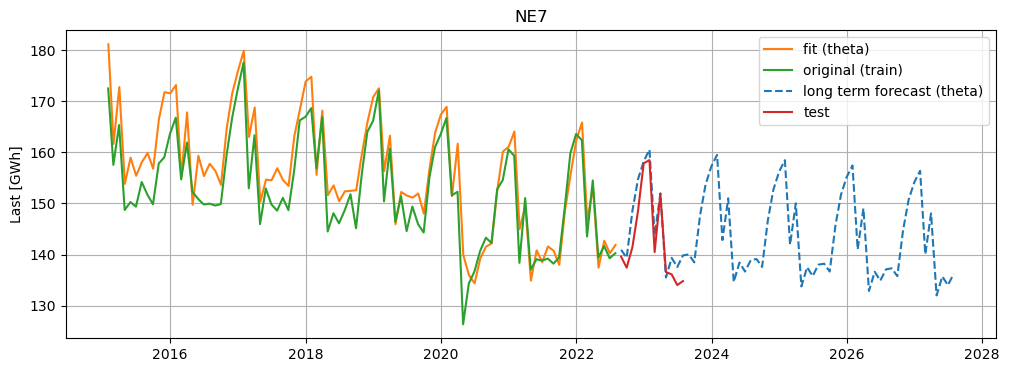

In [74]:
f, axes = plt.subplots(1, 1, figsize=(12, 4))

#axes.plot(y_pred.index.to_timestamp(how="end"), y_pred.values, color="black", label="forecast (theta)")
axes.plot(fit.index.to_timestamp(how="end"), fit.values, color="tab:orange", label="fit (theta)")
axes.plot(pdf_train.index, pdf_train.values, color="tab:green", label="original (train)")
axes.plot(five_years.index, five_years.values, color="tab:blue", linestyle="--",label="long term forecast (theta)")
axes.plot(pdf_test, color="tab:red", label="test")
axes.legend()
axes.set_title("NE7")
axes.set_ylabel("Last [GWh]")
axes.grid()
plt.show()

In [75]:
rmseValue = mean_squared_error(pdf_test.y.values, y_pred.values, squared=False)
rmseValue

3.6429909420130513